In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
from matplotlib import pyplot as plt
import seaborn as sbn
from tabulate import tabulate
from plotly.subplots import make_subplots

In [2]:
# leer el dataset comprimido
filename = 'datos/CVD_cleaned.csv.zip'

In [3]:
with ZipFile(filename, 'r') as f:
    names = f.namelist()
print(names)

['CVD_cleaned.csv']


In [4]:
zf = ZipFile(filename, 'r')
df_data = pd.read_csv( zf.open('CVD_cleaned.csv'), encoding='latin_1')

In [5]:
df_data.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [6]:
import matplotlib
matplotlib.font_manager.get_font_names()

['Segoe UI',
 'Times New Roman',
 'cmsy10',
 'cmtt10',
 'Malgun Gothic',
 'Myanmar Text',
 'Segoe Print',
 'Yu Gothic',
 'Tahoma',
 'Microsoft Tai Le',
 'Ink Free',
 'Impact',
 'cmmi10',
 'Webdings',
 'Toledo',
 'Microsoft Himalaya',
 'Mongolian Baiti',
 'MingLiU-ExtB',
 'Microsoft New Tai Lue',
 'STIXGeneral',
 'Lucida Sans Unicode',
 'Palatino Linotype',
 'Glasgow',
 'MicroSquare',
 'MS Gothic',
 'Segoe UI Symbol',
 'Nirmala UI',
 'DejaVu Serif Display',
 'Marlett',
 'STIXSizeTwoSym',
 'STIXSizeThreeSym',
 'Consolas',
 'Leelawadee UI',
 'Segoe UI Historic',
 'Segoe Script',
 'Gabriola',
 'Cambria',
 'DejaVu Sans Display',
 'Javanese Text',
 'Segoe UI Emoji',
 'STIXSizeFourSym',
 'MV Boli',
 'Verdana',
 'Segoe MDL2 Assets',
 'STIXSizeOneSym',
 'Constantia',
 'cmex10',
 'Seagull',
 'DejaVu Sans Mono',
 'Microsoft Sans Serif',
 'Lucida Console',
 'Symbol',
 'Franklin Gothic Medium',
 'DejaVu Sans',
 'Sitka Small',
 'Trebuchet MS',
 'Microsoft YaHei',
 'Wingdings',
 'Sylfaen',
 'Microsof

In [7]:
matplotlib.rcParams.update({'font.family': 'Courier New'})
matplotlib.rcParams.update({'font.size': 100})

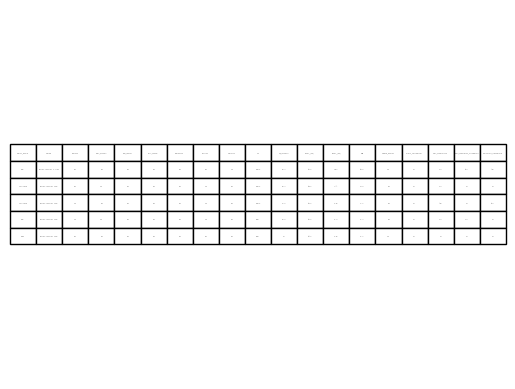

In [8]:
# Crear un gráfico de barras con el DataFrame
df_data_top_5 = df_data.head(5)

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
matplotlib.rcParams.update({'font.family': 'Courier New'})
matplotlib.rcParams.update({'font.size': 100})
ax.table(cellText=df_data_top_5.values, colLabels=df_data_top_5.columns, cellLoc='center',
         loc='center')


# Guardar el gráfico como una imagen PNG
plt.savefig('imagenes/dataset.png', format='png', bbox_inches='tight', pad_inches=0.1)

# Mostrar el gráfico (opcional)
plt.show()

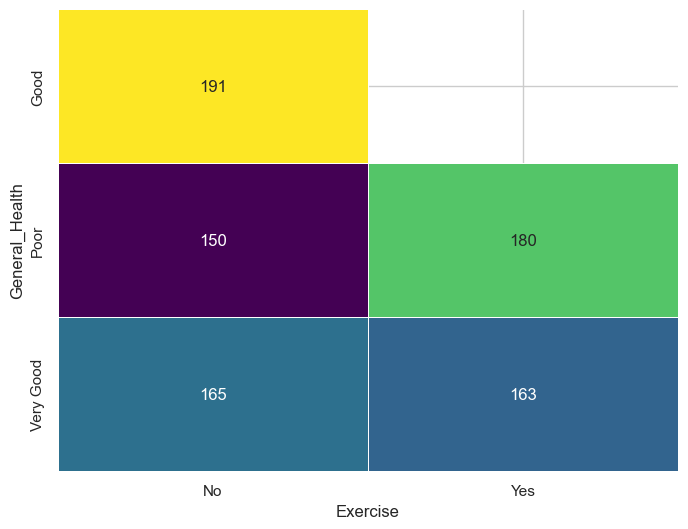

In [9]:
# Ejemplo de una pivot table
# Establecer el estilo de Seaborn (opcional, pero puede mejorar el aspecto)
sbn.set(style="whitegrid")

# Crear un gráfico de tabla con Seaborn
plt.figure(figsize=(8, 6))
sbn.heatmap(df_data_top_5.pivot_table(index='General_Health', columns='Exercise', values='Height_(cm)'),
            annot=True, fmt="g", cmap='viridis', cbar=False, linewidths=.5)

# Guardar el gráfico como una imagen PNG
plt.savefig('imagenes/dataset_seaborn.png', format='png', bbox_inches='tight', pad_inches=0.1)

# Mostrar el gráfico (opcional)
plt.show()

In [10]:
import plotly.graph_objects as go
import pandas as pd

# Crear un DataFrame de ejemplo
data = {'Nombre': ['Juan', 'María', 'Pedro', 'Ana'],
        'Edad': [25, 30, 22, 28],
        'Puntuación': [85, 90, 88, 78]}

df = pd.DataFrame(data)

# Crear una tabla en Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=df.columns),
    cells=dict(values=[df[col] for col in df.columns]))
])

# Establecer el diseño y guardar la figura
fig.update_layout(title_text="Tabla de Datos")
fig.write_image('imagenes/dataset_plotly.png')


In [11]:
import plotly.graph_objects as go

# Crear una figura con una tabla
fig = make_subplots(rows=1, cols=1, subplot_titles=["Tabla de Datos"])

# Crear una tabla en Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=df_data_top_5.columns),
    cells=dict(values=[df_data_top_5[col] for col in df_data_top_5.columns]))
])

# Añadir la tabla a la figura
#fig.add_trace(table_data[0], row=1, col=1)

# Establecer el diseño y guardar la figura
fig.update_layout(height=400, width=3500, title_text="Tabla de Datos")
fig.write_image('imagenes/dataset_head_5.png')

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# a bit of data to generate guages from...
df = pd.DataFrame({"team":["sprint 1", "sprint 2", "qa"],"backlog":[45,55,22],"defects":[23,44,33]}).set_index("team")

# need to define types of subplots...
fig = make_subplots(
    rows=len(df),
    cols=len(df.columns),
    specs=[[{"type": "indicator"} for c in df.columns] for t in df.index],
)

for r, team in enumerate(df.index):
    for c, measure in enumerate(df.columns):
        fig.add_trace(
            go.Indicator(mode="gauge+number", value=df.loc[team, measure], title={"text":f"{team} - {measure}"}),
            row=r + 1,
            col=c + 1,
        )

fig.update_layout(margin={"l": 0, "r": 20, "t": 50, "b": 0})

In [13]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    value = 200,
    delta = {'reference': 160},
    gauge = {
        'axis': {'visible': False}},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    value = 120,
    gauge = {
        'shape': "bullet",
        'axis' : {'visible': False}},
    domain = {'x': [0.05, 0.5], 'y': [0.15, 0.35]}))

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 300,
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "delta",
    value = 40,
    domain = {'row': 1, 'column': 1}))

fig.update_layout(
    grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},
    template = {'data' : {'indicator': [{
        'title': {'text': "Speed"},
        'mode' : "number+delta+gauge",
        'delta' : {'reference': 90}}]
                         }})

In [14]:
df_data.describe()

Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000                      4.000000   
50%            30.000000                     12.000000   
75%            30.000000                     20.000000   
max           120.000000                    128.000000   

       FriedPotato_Consumption  
count            308854.000000  
mean                  6.296616  
std                   8.582954  
min                   0.000000  
25%                   2.000000  
50%                   4.000000  
75%                   8.000000  
max                 128.000000

In [15]:
df_data.isna().any()

General_Health                  False
Checkup                         False
Exercise                        False
Heart_Disease                   False
Skin_Cancer                     False
Other_Cancer                    False
Depression                      False
Diabetes                        False
Arthritis                       False
Sex                             False
Age_Category                    False
Height_(cm)                     False
Weight_(kg)                     False
BMI                             False
Smoking_History                 False
Alcohol_Consumption             False
Fruit_Consumption               False
Green_Vegetables_Consumption    False
FriedPotato_Consumption         False
dtype: bool

In [16]:
df_data.isnull().any()

General_Health                  False
Checkup                         False
Exercise                        False
Heart_Disease                   False
Skin_Cancer                     False
Other_Cancer                    False
Depression                      False
Diabetes                        False
Arthritis                       False
Sex                             False
Age_Category                    False
Height_(cm)                     False
Weight_(kg)                     False
BMI                             False
Smoking_History                 False
Alcohol_Consumption             False
Fruit_Consumption               False
Green_Vegetables_Consumption    False
FriedPotato_Consumption         False
dtype: bool

In [17]:
df_data.columns.values

array(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease',
       'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes',
       'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)',
       'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'], dtype=object)

In [18]:
df_data.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

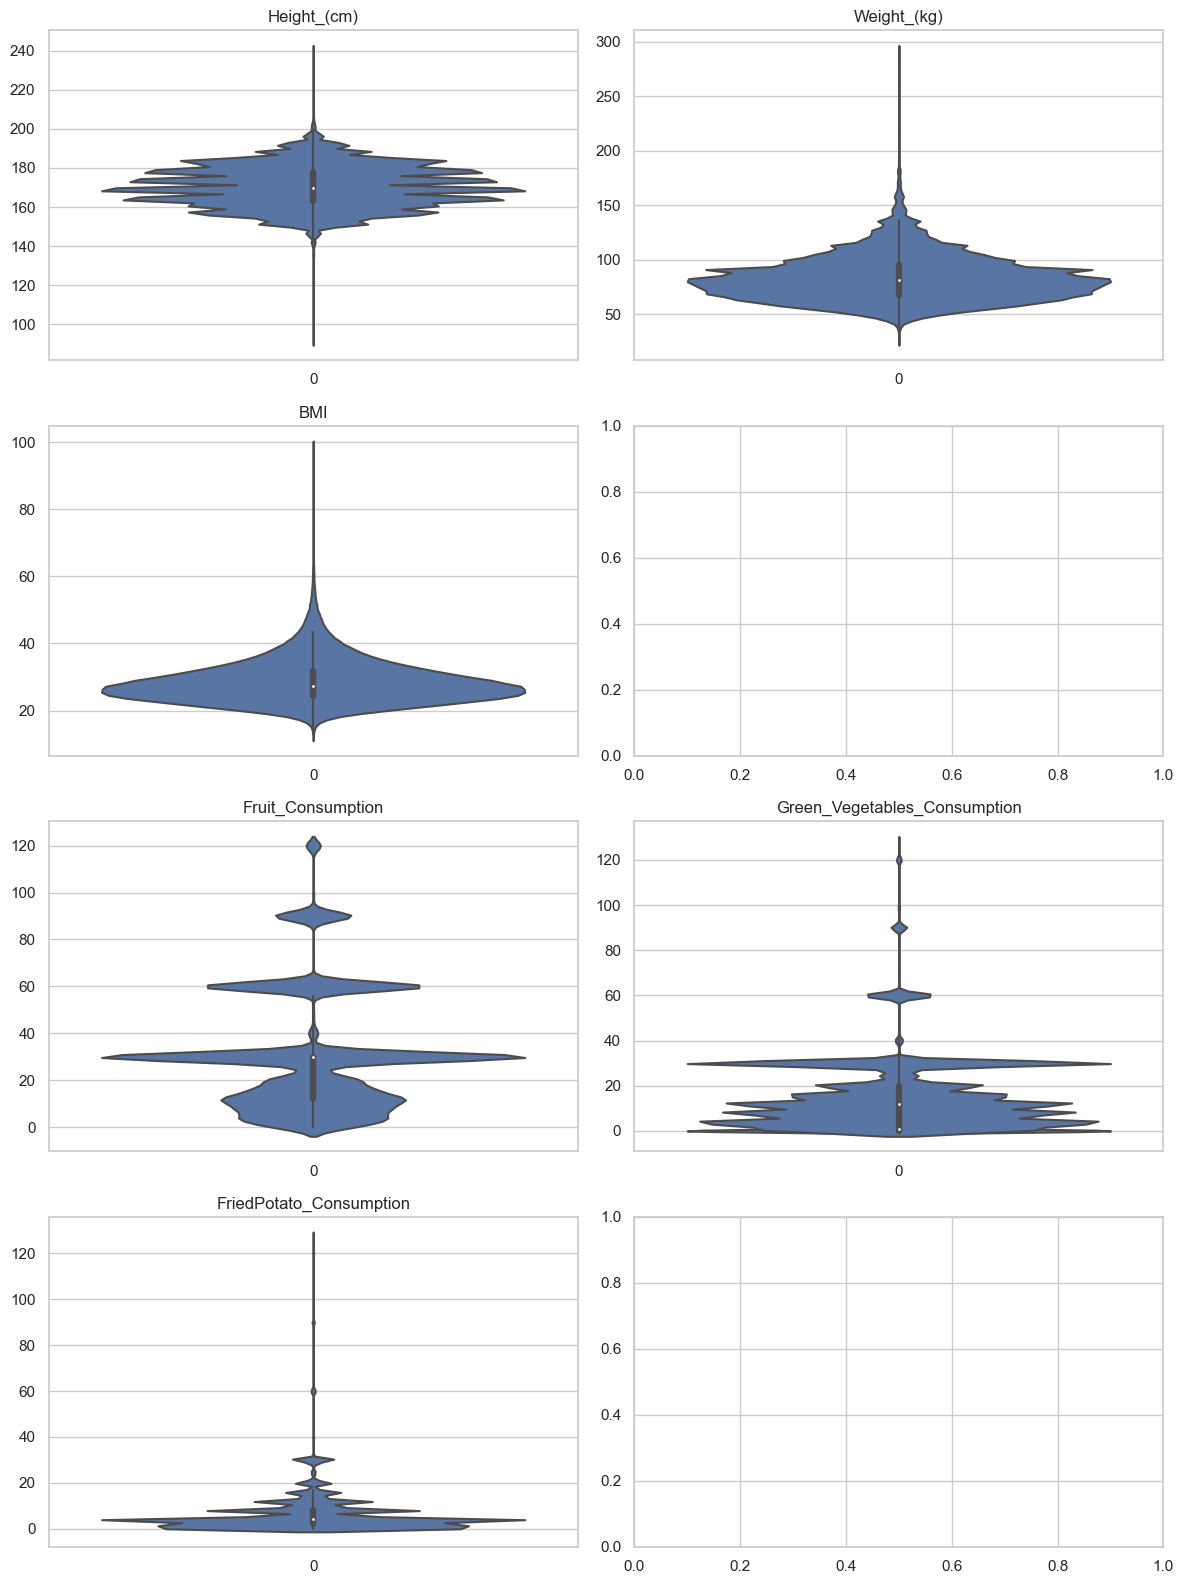

In [19]:
# Pintamos los diagramas de violin distribucion de los valores
# Crear un conjunto de subtramas (4 filas, 2 columnas)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
i = 0

for columna in df_data.columns.values:
    if(df_data[columna].dtype == 'float64'):
        sbn.violinplot(df_data[columna], ax=axes[round(i/2), i%2])
        axes[round(i/2), i%2].set_title(f'{columna}')
        i+=1
        
plt.tight_layout()

In [20]:
# Definir el orden deseado de las categorías
orden_categorias = np.unique(df_data.Age_Category)

In [21]:
# Discretizar Edades:
# Discretizar la variable categórica con el orden especificado
df_data['Age_Category'] = pd.Categorical(df_data['Age_Category'],
                                         categories=orden_categorias, ordered=True)

In [22]:
df_data.Age_Category.head()

0    70-74
1    70-74
2    60-64
3    75-79
4      80+
Name: Age_Category, dtype: category
Categories (13, object): ['18-24' < '25-29' < '30-34' < '35-39' ... '65-69' < '70-74' < '75-79' < '80+']